## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG','POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163


In [4]:
df.tail()

,DATE,TAG,POSTS
2239,2022-01-01 00:00:00,php,4398
2240,2022-01-01 00:00:00,python,23630
2241,2022-01-01 00:00:00,r,4336
2242,2022-01-01 00:00:00,ruby,485
2243,2022-01-01 00:00:00,swift,2070


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2244, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2244
TAG      2244
POSTS    2244
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
post_count = df.groupby('TAG').sum()
post_count

,POSTS
TAG,
assembly,39428
c,372971
c#,1518324
c++,752040
delphi,49107
go,58955
java,1822004
javascript,2324937
perl,66362


In [8]:
post_count.sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2324937
python,1874837
java,1822004
c#,1518324
php,1425146
c++,752040
r,433986
c,372971
swift,307831


In [9]:
post_count.max()

POSTS    2324937
dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,162,162
c,162,162
c#,163,163
c++,162,162
delphi,162,162
go,147,147
java,162,162
javascript,162,162
perl,162,162


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
# df.DATE[1]

df['DATE'][1]

'2008-08-01 00:00:00'

In [12]:
type(df['DATE'][1])

str

In [13]:
pd.to_datetime(df.DATE[1])

Timestamp('2008-08-01 00:00:00')

In [14]:
print(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


In [15]:
type(pd.to_datetime(df.DATE[1]))

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df.DATE = pd.to_datetime(df['DATE'])

df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163


## Data Manipulation



In [17]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [18]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


Challenge



In [19]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,197.0,1799.0,5756.0,3914.0,143.0,659.0,7790.0,16665.0,114.0,4315.0,21919.0,4327.0,507.0,1935.0
2021-10-01,223.0,2205.0,6030.0,4083.0,150.0,761.0,7788.0,16201.0,131.0,4282.0,22954.0,4747.0,479.0,1850.0
2021-11-01,311.0,2343.0,6409.0,4180.0,151.0,706.0,8309.0,15882.0,81.0,4145.0,23469.0,4635.0,449.0,1766.0


In [20]:
# Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?

reshaped_df.shape

(163, 14)

In [21]:
# Examine the head and the tail of the DataFrame. What does it look like?

reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


In [22]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-09-01,197.0,1799.0,5756.0,3914.0,143.0,659.0,7790.0,16665.0,114.0,4315.0,21919.0,4327.0,507.0,1935.0
2021-10-01,223.0,2205.0,6030.0,4083.0,150.0,761.0,7788.0,16201.0,131.0,4282.0,22954.0,4747.0,479.0,1850.0
2021-11-01,311.0,2343.0,6409.0,4180.0,151.0,706.0,8309.0,15882.0,81.0,4145.0,23469.0,4635.0,449.0,1766.0
2021-12-01,289.0,2270.0,5758.0,3890.0,158.0,775.0,7582.0,15373.0,103.0,3772.0,22166.0,3933.0,437.0,1676.0
2022-01-01,251.0,2144.0,6179.0,4086.0,152.0,833.0,8098.0,17015.0,134.0,4398.0,23630.0,4336.0,485.0,2070.0


In [23]:
# Print out the column names.

# for x in reshaped_df.columns:
#     print(x)

reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [24]:
# Count the number of entries per column.

reshaped_df.count()

TAG
assembly      162
c             162
c#            163
c++           162
delphi        162
go            147
java          162
javascript    162
perl          162
php           162
python        162
r             160
ruby          162
swift         154
dtype: int64

In [25]:
#  deling with NaN values

reshaped_df.fillna(0, inplace=True)

In [26]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0


In [27]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [28]:
import matplotlib.pyplot as plt

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

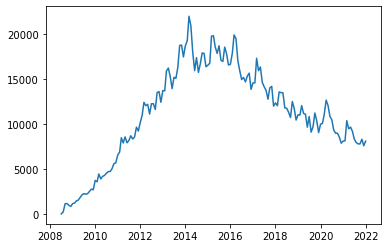

In [48]:
plt.plot(reshaped_df.index, reshaped_df['java'])

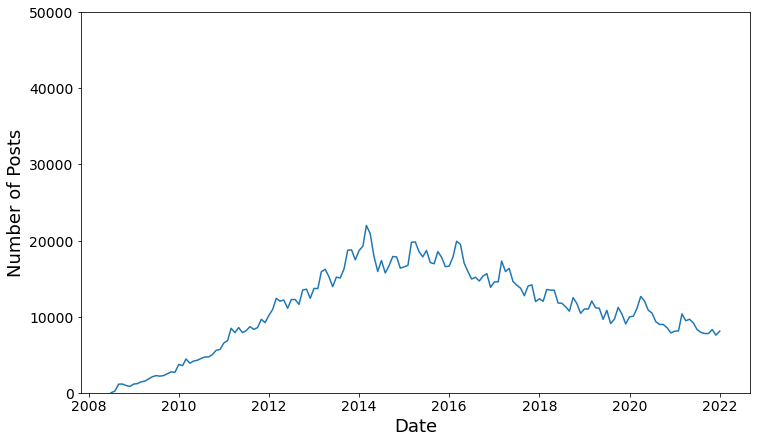

In [49]:
# for wifht & hieght
plt.figure(figsize=(12, 7))

# text size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)

# lower limit
plt.ylim(0, 50000)


plt.plot(reshaped_df.index, reshaped_df['java'])

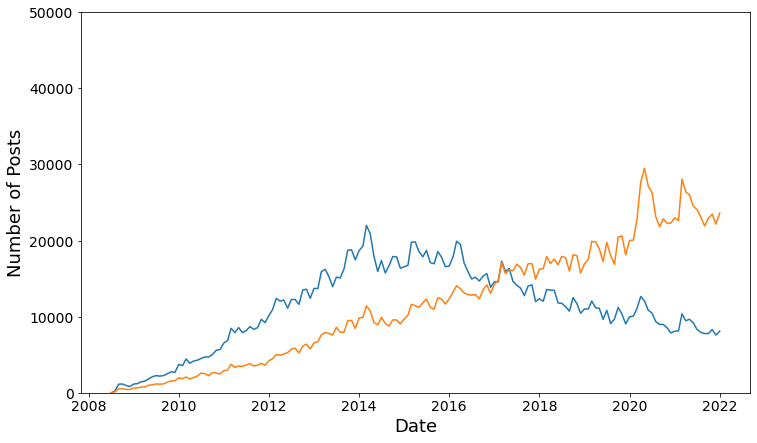

In [61]:
plt.figure(figsize=(12, 7))

plt.ylabel('Number of Posts', fontsize=18)
plt.xlabel('Date', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 50000)

plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

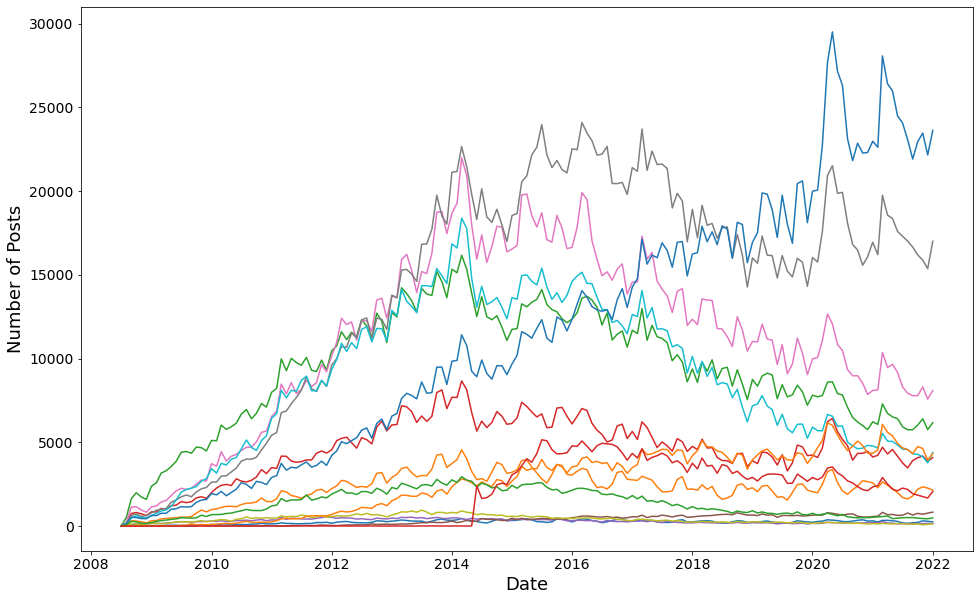

In [64]:
# PLOT ALL PROGRAMMING LANGUAGE

plt.figure(figsize=(16, 10))

plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

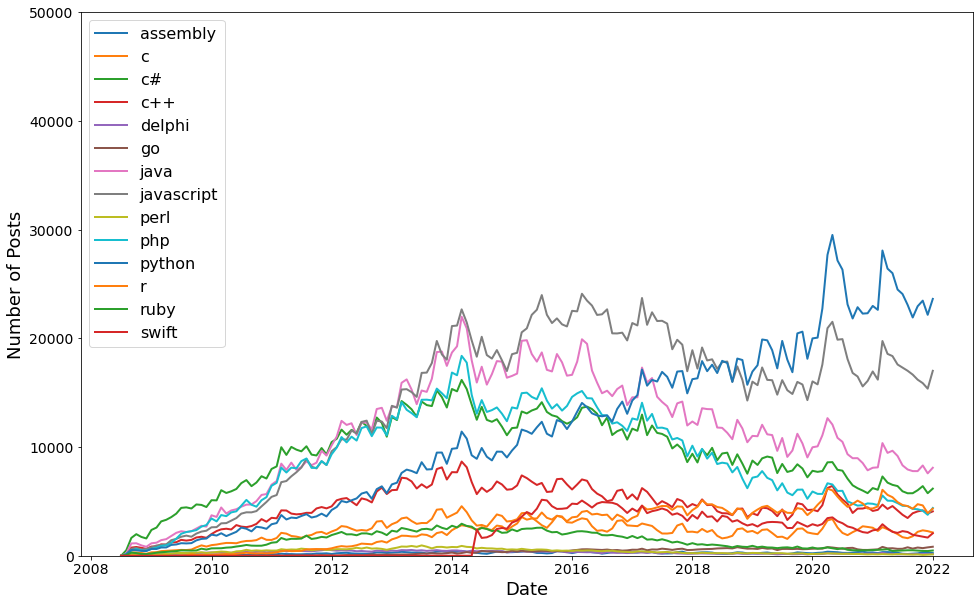

In [70]:
# PLOT ALL PROGRAMMING LANGUAGE WITH LEGEND

plt.figure(figsize=(16, 10))

plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 50000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

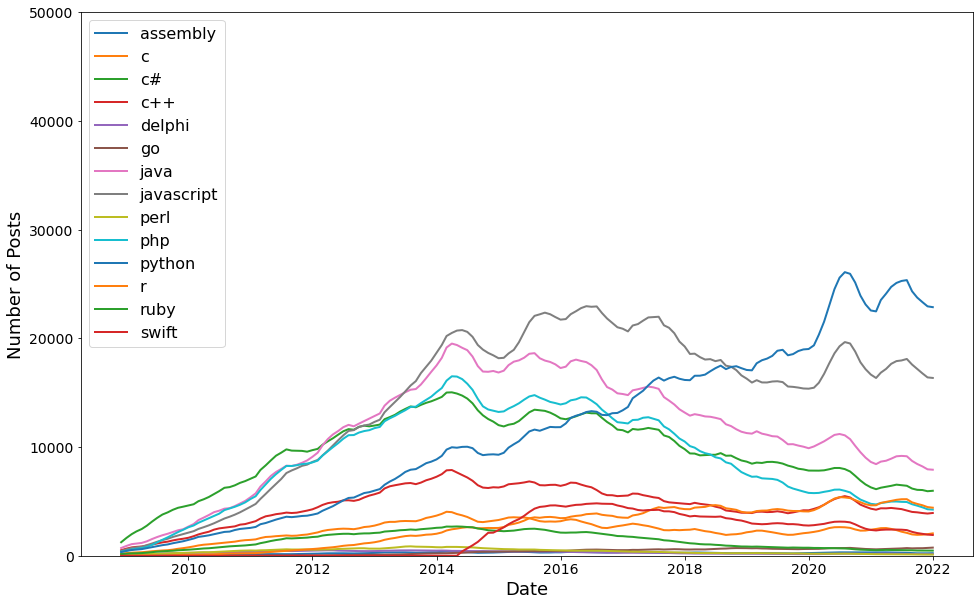

In [75]:
# you can change window value
roll_df = reshaped_df.rolling(window=6).mean()


plt.figure(figsize=(16, 10))

plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of Posts', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 50000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=2, label=roll_df[column].name)

plt.legend(fontsize=16)